In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 120)

In [3]:
with pd.HDFStore("/Users/rlx/datasets/twosigma/train.h5", "r") as train:
    df = train.get("train")

In [21]:
np.max(df.timestamp)

1812

In [11]:
len([i for i in df.columns if i.startswith("deriv")])


5

In [16]:
df[df.timestamp==0]

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,NaN,-0.072108,0.249187,0.024401,-0.127942,NaN,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,NaN,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,NaN,0.037680,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.273957,NaN,-2.0,-2.0,NaN,0.001652,-2.0,NaN,-2.0,NaN,0.652981,0.000000,-0.142453,0.0,NaN,NaN,1.427469,NaN,-2.0,0.000000,NaN,NaN,NaN,0.0,0.937880,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.096750,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,NaN,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,NaN,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.159432,NaN,0.0,-2.0,NaN,0.004317,0.0,NaN,-2.0,NaN,-0.399520,0.000000,-0.309356,-0.5,NaN,NaN,0.154613,NaN,0.0,0.000000,NaN,NaN,NaN,0.5,0.232154,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,NaN,NaN,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,NaN,0.172751,0.961091,1.028205,-0.165369,0.056006,NaN,0.249530,-0.156078,NaN,0.019192,0.053364,-0.020247,NaN,0.064028,-0.249106,-0.106216,-0.085509,0.383589,NaN,-0.074021,-0.054295,-0.746073,-0.057605,-0.126238,0.462523,0.060902,NaN,-0.262892,-0.059395,0.562975,-0.026392,0.013430,-0.627150,-0.470362,-0.101865,0.436794,-0.057049,-0.120851,-0.061941,-0.600019,0.138357,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.227811,NaN,-2.0,-2.0,NaN,0.000000,-2.0,NaN,-2.0,NaN,-0.496284,0.006942,0.122841,-0.5,NaN,NaN,0.37833

In [13]:
print ("NULLS per column")
for col in df.columns:
    nulls = df[col].isnull().sum()
    print("%20s"%col, "%7d"%nulls, "(%5.2f"%(nulls*100./len(df))+"%)")



NULLS per column
                  id       0 ( 0.00%)
           timestamp       0 ( 0.00%)
           derived_0   72959 ( 4.26%)
           derived_1   81029 ( 4.74%)
           derived_2  398651 (23.30%)
           derived_3  149471 ( 8.74%)
           derived_4  406458 (23.76%)
       fundamental_0   23947 ( 1.40%)
       fundamental_1  679070 (39.69%)
       fundamental_2  368840 (21.56%)
       fundamental_3  454380 (26.56%)
       fundamental_5  962020 (56.23%)
       fundamental_6  701625 (41.01%)
       fundamental_7   26340 ( 1.54%)
       fundamental_8  373166 (21.81%)
       fundamental_9  565567 (33.06%)
      fundamental_10  112977 ( 6.60%)
      fundamental_11  368840 (21.56%)
      fundamental_12  110871 ( 6.48%)
      fundamental_13  355138 (20.76%)
      fundamental_14  356084 (20.81%)
      fundamental_15  354897 (20.75%)
      fundamental_16  355138 (20.76%)
      fundamental_17   97222 ( 5.68%)
      fundamental_18   15833 ( 0.93%)
      fundamental_19   54588 ( 3.

distribution of timestamps

In [14]:
np.unique(df.timestamp)

array([   0,    1,    2, ..., 1810, 1811, 1812], dtype=int16)

1813 [1]


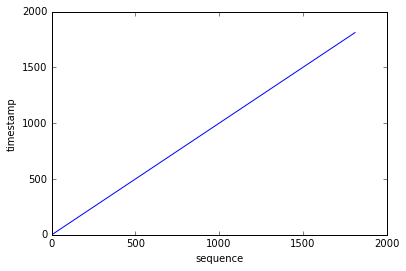

In [28]:
times = np.unique(df.timestamp)
print(len(times), np.unique(times[1:]-times[:-1]))
plt.plot(times)
plt.xlabel("sequence")
plt.ylabel("timestamp")

distribution of asset ids

In [24]:
assets = np.unique(df.id)
print (len(assets), np.unique(assets[1:]-assets[:-1]))

1424 [1 2 3 4 5 6 7]


assets per timestamp

In [25]:
tcounts = [np.sum(df.timestamp==i) for i in times]

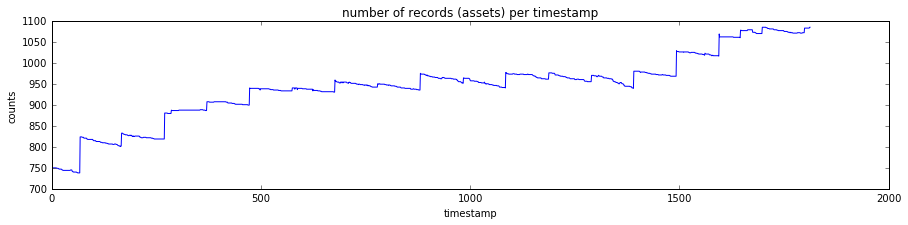

In [30]:
plt.figure(figsize=(15,3))
plt.plot(times, tcounts)
plt.xlabel("timestamp")
plt.ylabel("counts")
plt.title("number of records (assets) per timestamp")

unique assets per timestamp

In [31]:
tunique_assets = [len(np.unique(df.id[df.timestamp==i])) for i in times]

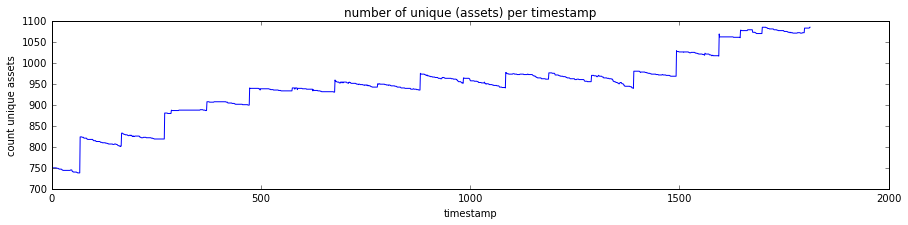

In [34]:
plt.figure(figsize=(15,3))
plt.plot(times, tunique_assets)
plt.xlabel("timestamp")
plt.ylabel("count unique assets")
plt.title("number of unique (assets) per timestamp")

each assets happens only one in each timestamp

In [36]:
tcounts = np.array(tcounts)
tunique_assets = np.array(tunique_assets)
np.min(tcounts-tunique_assets), np.max(tcounts-tunique_assets)

(0, 0)

choose random vars and assets and plot them in time

In [17]:
fcols = np.array([i for i in df.columns if i.startswith("fundamental")])
tcols = np.array([i for i in df.columns if i.startswith("technical")])
dcols = np.array([i for i in df.columns if i.startswith("derived")])
ids = np.unique(df.id)

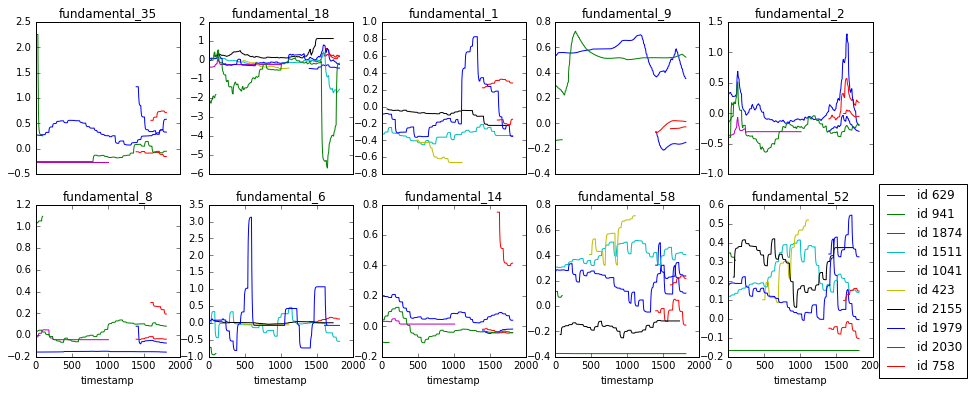

In [18]:
plt.figure(figsize=(15,6))
features = np.random.permutation(fcols)[:10]
ids = np.random.permutation(ids)[:10]
for i, feature in enumerate(features):
    plt.subplot(2,5,i+1)
    for id in ids:
        dfi = df[df.id==id]
        plt.plot(dfi.timestamp, dfi[feature], label="id "+str(id))
    if i<5: plt.xticks([]) 
    else:   plt.xlabel("timestamp")
    plt.title(feature)
    if i==len(features)-1: plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

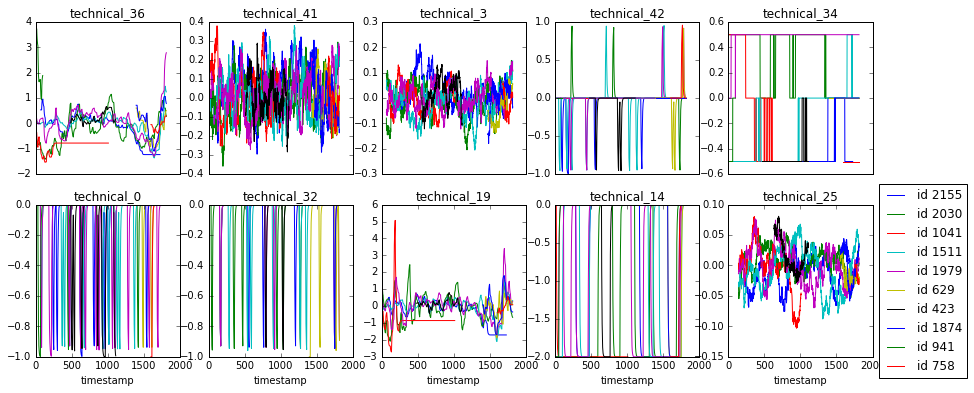

In [19]:
plt.figure(figsize=(15,6))
technicals = np.random.permutation(tcols)[:10]
ids = np.random.permutation(ids)[:10]
for i, technical in enumerate(technicals):
    plt.subplot(2,5,i+1)
    for id in ids:
        dfi = df[df.id==id]
        plt.plot(dfi.timestamp, dfi[technical], label="id "+str(id))
    if i<5: plt.xticks([]) 
    else:   plt.xlabel("timestamp")
    plt.title(technical)
    if i==len(features)-1: plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

distributions of values of some vars

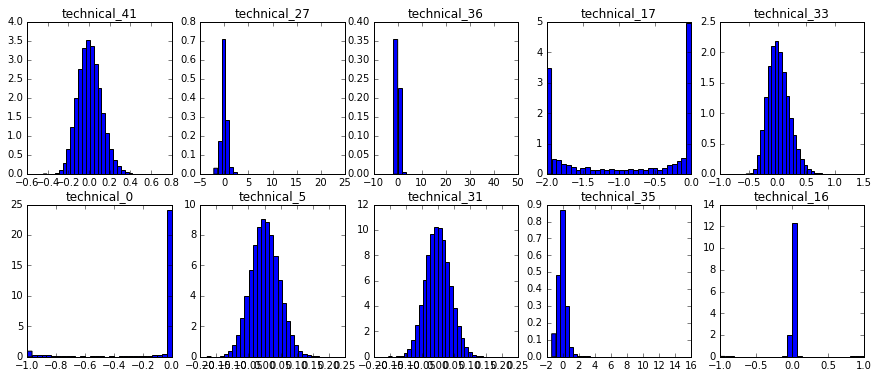

In [67]:
plt.figure(figsize=(15,6))
technicals = np.random.permutation(tcols)[:10]
ids = np.random.permutation(ids)[:10]
for i, technical in enumerate(technicals):
    plt.subplot(2,5,i+1)
    ddd = df[technical].dropna().as_matrix()
    plt.hist(ddd, normed=True, bins=30)
    plt.title(technical)

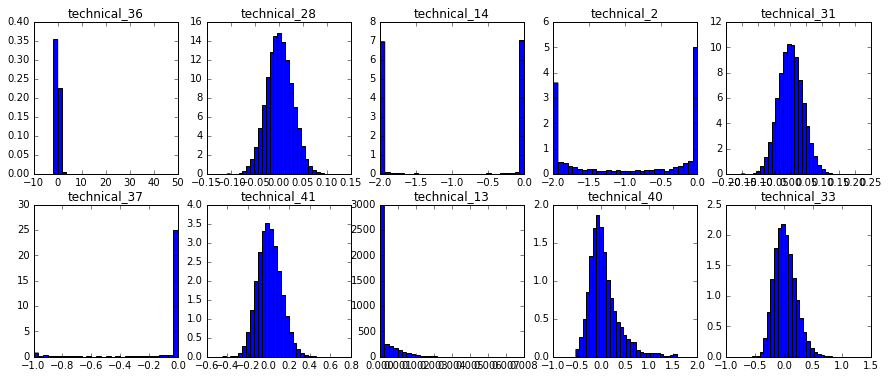

In [20]:
plt.figure(figsize=(15,6))
fundamentals = np.random.permutation(tcols)[:10]
ids = np.random.permutation(ids)[:10]
for i, fundamental in enumerate(fundamentals):
    plt.subplot(2,5,i+1)
    ddd = df[fundamental].dropna().as_matrix()
    plt.hist(ddd, normed=True, bins=30)
    plt.title(fundamental)

distributions of $y$ values

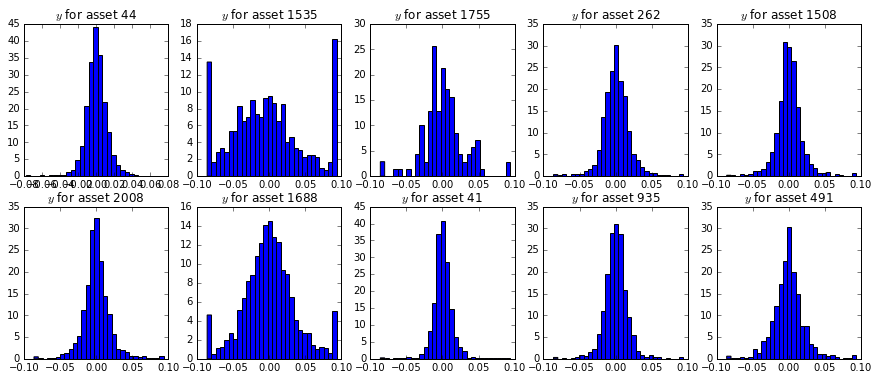

In [82]:
plt.figure(figsize=(15,6))
ids = np.random.permutation(ids)[:10]
for i, id in enumerate(ids):
    plt.subplot(2,5,i+1)
    didy = df[df.id==id].y.as_matrix()
    plt.hist(didy, normed=True, bins=30)
    plt.title("$y$ for asset "+str(id))

In [120]:
id = ids[np.random.randint(len(ids))]
did = df[df.id==id][[i for i in df.columns if i!="id" and i!="timestamp"]]
corr = did.corr().dropna()

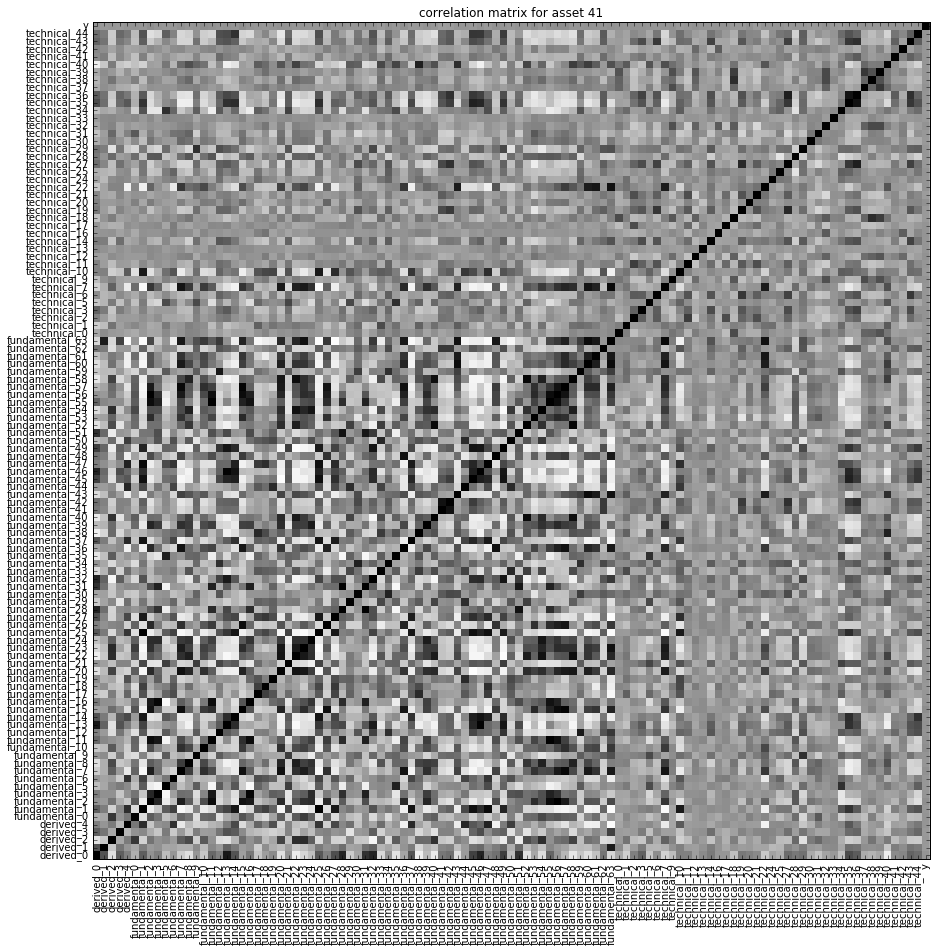

In [129]:
plt.figure(figsize=(15,15))
plt.imshow(corr.as_matrix(), cmap=plt.cm.Greys, origin="lower", interpolation="none")
plt.title("correlation matrix for asset "+str(id))
plt.yticks(range(len(corr)),corr.columns);
plt.xticks(range(len(corr)),corr.columns, rotation='vertical');
